In [1]:
# This is a clustering problem for Retail Data 

Hierarchial Clustering

In [7]:
# Import Libraries & DataSets
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import numpy as np

In [8]:
customer_data = pd.read_csv('shopping_data.csv')  

In [9]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
customer_data.shape

(200, 5)

In [13]:
data = customer_data.iloc[:, 3:5].values

# Run Dendogram based hierarchial clustering

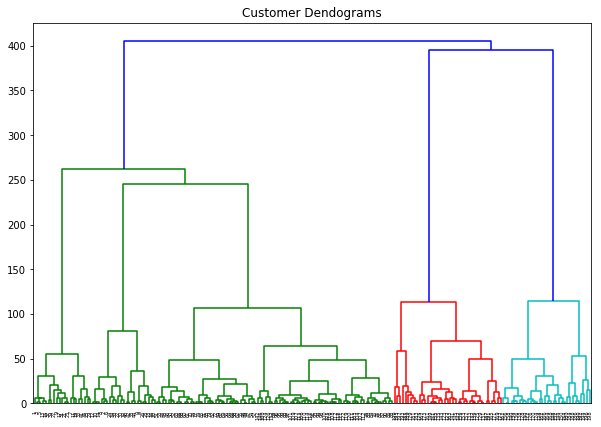

In [16]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'))

# Predict the clusters for the observations

In [17]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

# Plot the clusters

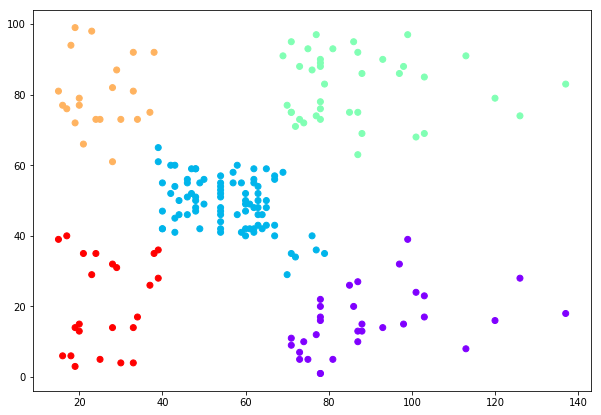

In [18]:
plt.figure(figsize=(10, 7))  
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

# K-Means Clustering

# Import Libraries and Dataset

In [20]:
#importing the dataset
dataset = pd.read_csv('Cust_Spend_Data.csv')
#creating a duplicate dataset to work on
dataset1 = dataset
# peeking at the dataset
dataset1.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3


In [21]:
#Descriptive stats of the variables in data
dataset1.describe()

,Cust_ID,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
count,10.00000,10.000000,10.000000,10.000000,10.0000,10.00000
mean,5.50000,4850.000000,4.000000,0.300000,4.3000,4.00000
std,3.02765,2877.595447,1.699673,0.483046,4.6916,3.05505
min,1.00000,1000.000000,2.000000,0.000000,1.0000,0.00000
25%,3.25000,2500.000000,3.000000,0.000000,1.0000,2.00000
50%,5.50000,5000.000000,3.500000,0.000000,1.5000,3.50000
75%,7.75000,6875.000000,5.000000,0.750000,8.2500,6.25000
max,10.00000,10000.000000,7.000000,1.000000,12.0000,9.00000


# Feature Scaling

In [22]:
data = dataset1.iloc[:, 2:6].values  #standardize the data to normal distribution
from sklearn import preprocessing
dataset1_standardized = preprocessing.scale(data)
dataset1_standardized = pd.DataFrame(dataset1_standardized)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


# WSS Plot or Elbow Curve for Optimal cluster identification

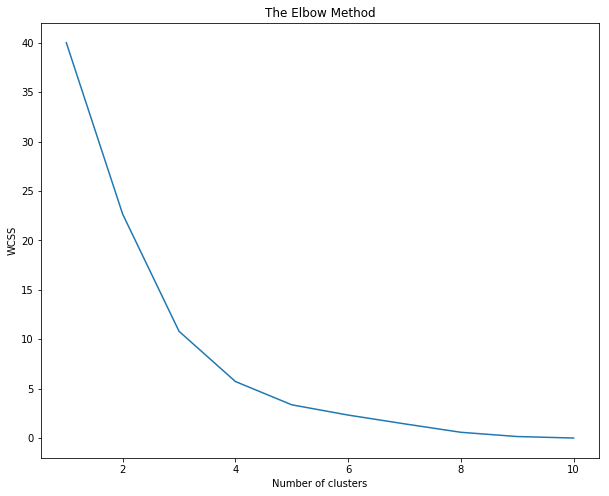

In [25]:
# find the appropriate cluster number
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset1_standardized)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# K-Means Clustering & Cluster Information

In [28]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(dataset1_standardized)
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1
# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)
# Adding cluster to the Dataset1
dataset1['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(dataset1.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Cust_ID,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
cluster,,,,,,
1,4.7,5166.7,4.7,0.0,11.0,4.7
2,8.2,2375.0,3.0,0.0,1.2,4.5
3,2.7,7833.3,4.7,1.0,1.7,2.7


# K-Means in Action

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

We then randomly generate 200 values divided in two clusters of 100 data points each.

In [31]:
x = -2 * np.random.rand(200,2)
x0 = 1 + 2 * np.random.rand(100,2)
x[100:200, :] = x0

We proceed to plot our generated random values and obtain the following graph.

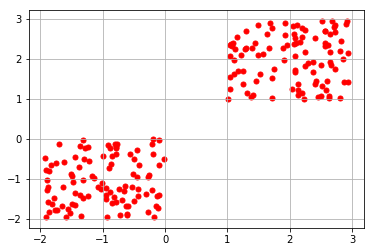

In [32]:
plt.scatter(x[ : , 0], x[ :, 1], s = 25, color='r')
plt.grid()

From the above graph, we observe that about 200 data points have been partitioned in two clusters, where each cluster contains 100 data points.

After plotting our two clusters, we proceed to implement our k-means learning algorithm to establish the centroids for our clusters. We initiate the k, which represents the cluster with a random value of 3.

In [33]:
Kmean = KMeans(n_clusters=3)
Kmean.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

After this, we proceed to find the location of the centroids of our two clusters. We obtain the following result after typing the following line of code

In [34]:
Kmean.cluster_centers_

array([[ 1.99196862,  2.48367635],
       [-1.00334719, -1.0714373 ],
       [ 2.07440663,  1.43028269]])

We then proceed to visualize the centroids of our two clusters:

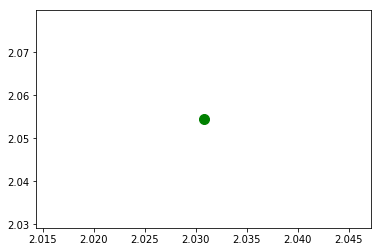

In [35]:
plt.scatter(2.03078996,  2.05446538, s=100, color='green')
plt.show()

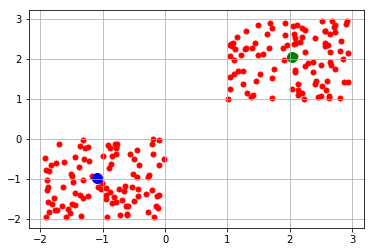

In [36]:
plt.scatter(x[ : , 0], x[ :, 1], s = 25, color='r')
plt.grid()

plt.scatter(2.03078996,  2.05446538, s=100, color='green')
plt.scatter(-1.09854487,-0.97359539, s=100,color='blue')
plt.show()

In the above visualization, we obtain the centroids for our two clusters. Now, we will test our model. In the testing phase, we will first display the labels that are distributed across our two labels (0,1) which represent the clusters.

In [38]:
Kmean.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0,
       2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0,
       2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2,
       0, 2])

We can clearly observe from the above output that 100 values belong to label 0 and 100 values belong to label 1.

In [39]:
sample_test=np.array([4.0,5.0])
second_test=sample_test.reshape(1, -1)
Kmean.predict(second_test)

array([0])

From the above code, we can conclude that K-means clustering is easy to understand and an easy to implement algorithm. We will now take a look at some of the practical applications of K-means clustering.


# K-Mean Clustring

In [40]:
import matplotlib.pyplot as plt
import numpy as np

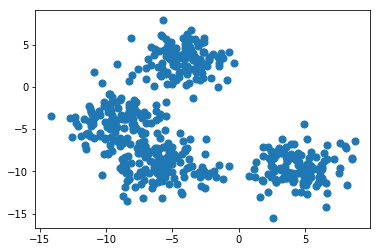

In [41]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=500, centers=4,
                       cluster_std=1.8, random_state=21)
plt.scatter(X[:, 0], X[:, 1], s=50)

In [43]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [45]:
y_kmeans

array([4, 7, 5, 5, 2, 1, 2, 3, 4, 2, 0, 3, 5, 2, 7, 2, 4, 3, 5, 0, 2, 2,
       4, 5, 6, 7, 0, 4, 2, 7, 0, 6, 7, 7, 5, 3, 3, 1, 7, 7, 3, 5, 0, 3,
       3, 1, 3, 7, 5, 4, 3, 6, 7, 5, 5, 3, 6, 3, 3, 0, 2, 3, 0, 6, 4, 4,
       1, 0, 2, 3, 3, 4, 3, 3, 3, 6, 6, 3, 5, 1, 2, 7, 0, 3, 3, 4, 2, 3,
       5, 0, 3, 5, 7, 7, 2, 1, 7, 7, 7, 5, 0, 7, 2, 5, 3, 4, 3, 7, 5, 2,
       3, 5, 6, 2, 7, 6, 3, 2, 4, 6, 7, 3, 0, 6, 3, 6, 0, 4, 7, 6, 3, 7,
       5, 2, 0, 4, 7, 3, 5, 0, 7, 7, 3, 3, 3, 7, 3, 7, 5, 3, 1, 4, 0, 1,
       0, 3, 3, 0, 4, 1, 5, 7, 7, 5, 3, 2, 5, 3, 3, 5, 5, 2, 4, 0, 7, 3,
       4, 4, 3, 7, 2, 5, 4, 7, 3, 3, 3, 3, 5, 5, 0, 7, 5, 6, 5, 3, 4, 4,
       3, 3, 7, 2, 3, 6, 5, 7, 5, 3, 3, 0, 1, 2, 6, 7, 7, 3, 5, 0, 6, 6,
       5, 2, 5, 3, 7, 2, 6, 3, 3, 3, 7, 4, 5, 2, 4, 1, 6, 1, 7, 0, 3, 4,
       4, 0, 6, 6, 7, 3, 5, 7, 2, 3, 4, 3, 7, 5, 3, 6, 0, 5, 7, 6, 4, 4,
       3, 0, 0, 5, 1, 4, 1, 3, 4, 0, 2, 2, 1, 3, 4, 2, 6, 7, 6, 1, 6, 6,
       2, 0, 7, 0, 3, 5, 3, 5, 3, 7, 2, 2, 6, 3, 3,

[[ -3.47470964   1.99528456]
 [ -2.93811199 -10.33863488]
 [-10.43151585  -5.48733619]
 [  4.51348326  -9.56087145]
 [ -5.90895693  -7.44157084]
 [ -4.76124273   4.36815699]
 [ -7.3054     -10.42584148]
 [ -8.6017432   -2.75972563]]


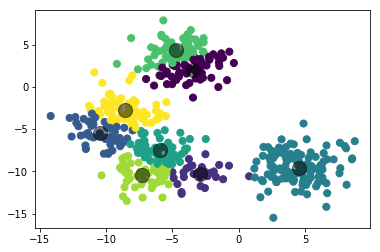

In [46]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
print(centers)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)